<a href="https://colab.research.google.com/github/dmejiaho/Se-ales-y-sistemas-Python/blob/main/Daniel__Mejia_Convolucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicios Convolución-Daniel Mauricio Mejia Hoyos

**Ejemplo**

La convolución $y(t) = x(t) * h(t)$ se realizará a partir de las siguientes señales

\begin{align}
h(t) &= e^{-t} \\
x(t) &= \text{rect} \left(t - \frac{1}{2}\right)
\end{align}


In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t, tau = sym.symbols('t tau', real=True)#variables simbólicas

In [ ]:
class rect(sym.Function): #función pulso rectangular
    @classmethod
    def eval(cls, arg):
        return sym.Heaviside(arg + sym.S.Half) - sym.Heaviside(arg - sym.S.Half)

In [ ]:
def plot_signals(x_axis, x, h, ylabel, xlabel):#función para graficar convolución
    p1 = sym.plot(x, (x_axis, -5, 5), show=False, line_color='b', ylabel=ylabel, xlabel=xlabel)
    p2 = sym.plot(h, (x_axis, -5, 5), show=False, line_color='r')
    p1.extend(p2)
    p1.show()

Ahora vamos a definir y trazar las señales. A continuación, la señal $h(t)$ se ilustra mediante el gráfico rojo y la señal $x(t)$ mediante el gráfico azul.

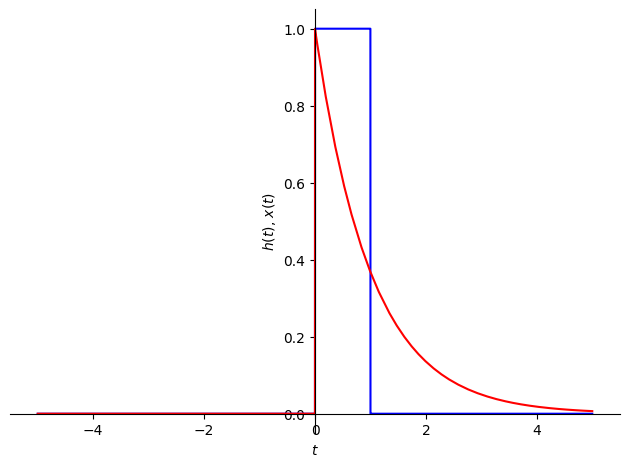

In [ ]:
h = sym.exp(-t) * sym.Heaviside(t)
x = rect(t - 1/2)

plot_signals(t, x, h, r'$h(t)$, $x(t)$', r'$t$')

 El **primer paso** es sustituir $t$ por $\tau$ para obtener $h(\tau)$ y $x(\tau)$. Observe que el eje independiente ahora representa a $\tau$.

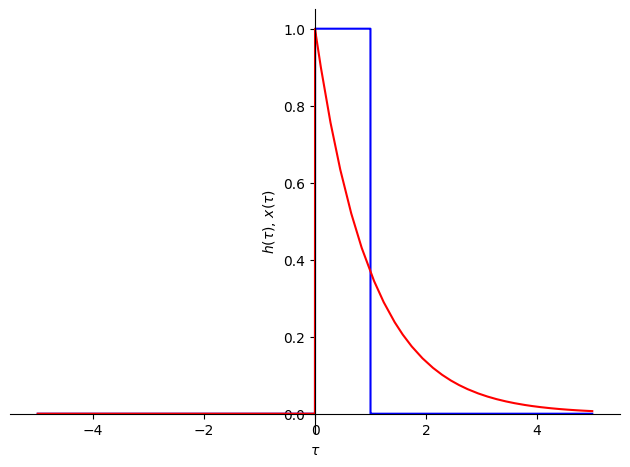

In [ ]:
h1 = h.subs(t, tau)
x1 = x.subs(t, tau)

plot_signals(tau, x1, h1, r'$h(\tau)$, $x(\tau)$', r'$\tau$')

El **segundo paso** es reflejar $h(\tau)$ para obtener $h(-\tau)$

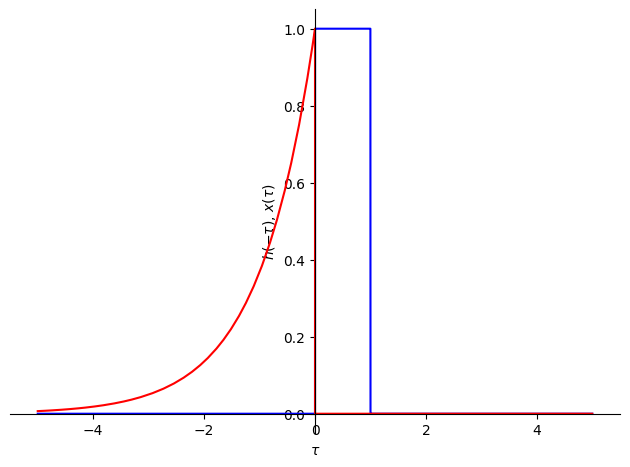

In [ ]:
h2 = h1.subs(tau, -tau)

plot_signals(tau, x1, h2, r'$h(-\tau)$, $x(\tau)$', r'$\tau$')

La respuesta al impulso $h(-\tau)$ se desplaza por $t$ a la derecha en el **tercer paso** para obtener $h(t - \tau)$. Esto se ilustra para $t = -2$

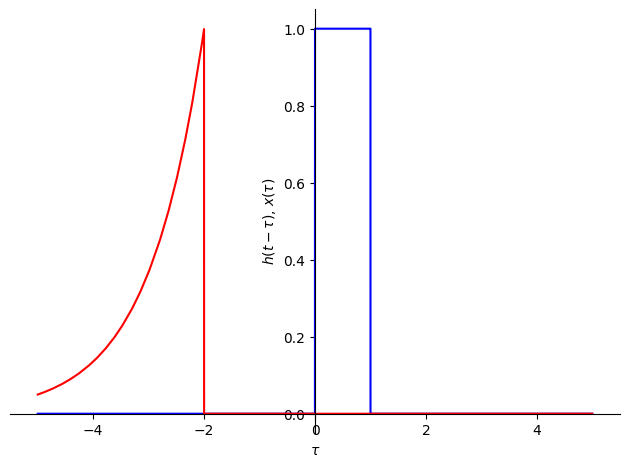

In [ ]:
h3 = h2.subs(tau, tau-t)

plot_signals(tau, x1, h3.subs(t, -2), r'$h(t-\tau)$, $x(\tau)$', r'$\tau$')

Ahora resulta obvio que tenemos que considerar tres casos con respecto a la superposición de $h(t-\tau)$ y $x(\tau)$

1. $t<0$: sin traslape
2. $0 \leq t < 1$: traslape parcial
3. $t > 0$: traslape completo



**Ejercicio**

En el **cuarto paso**, la evaluación de las integrales de convolución para los tres casos se deja abierta como un ejercicio. Tenga en cuenta que, en el primer caso, no se superponen, es decir que $y(t)=0$ para $t<0$.

###t<0 :


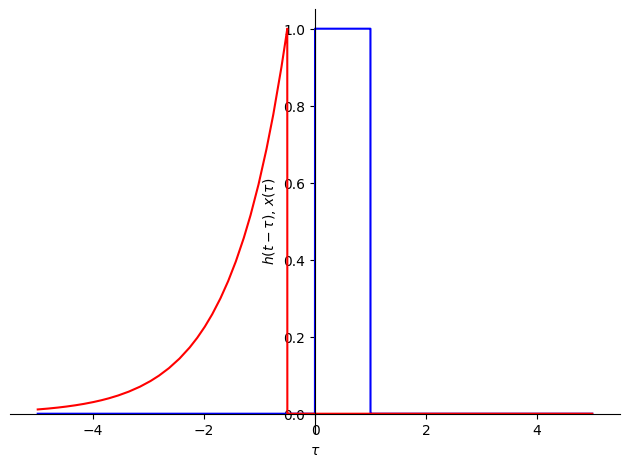

In [ ]:
h4 = h2.subs(tau, tau-t)

plot_signals(tau, x1, h4.subs(t, -0.5), r'$h(t-\tau)$, $x(\tau)$', r'$\tau$')

In [ ]:
exp=sym.exp(tau-t)
re=sym.integrate(exp.subs(t,-0.5)*h4.subs(t, -0.5),(tau,0,1))
re

0

## 2
$0 \leq t < 1$:

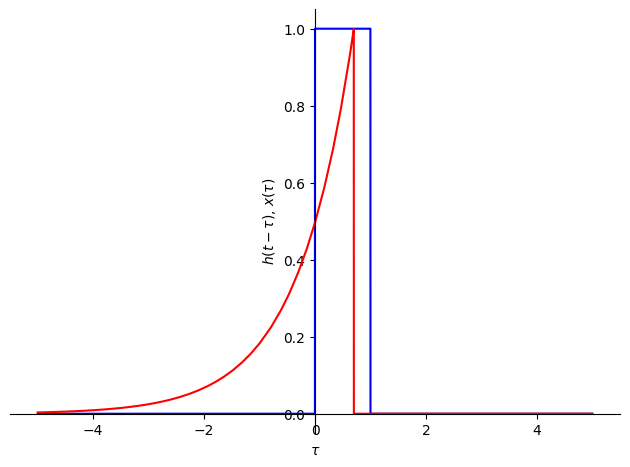

In [ ]:
h5 = h2.subs(tau, tau-t)

plot_signals(tau, x1, h5.subs(t, 0.7), r'$h(t-\tau)$, $x(\tau)$', r'$\tau$')

In [ ]:
re2=sym.integrate(exp.subs(t,0.7),(tau,0,1))
re2

-0.49658530379141 + 0.49658530379141⋅ℯ

## t>1

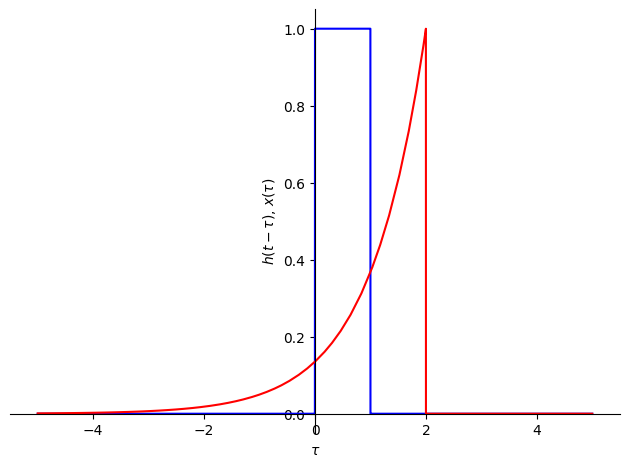

In [ ]:
h6 = h2.subs(tau, tau-t)

plot_signals(tau, x1, h6.subs(t, 2), r'$h(t-\tau)$, $x(\tau)$', r'$\tau$')

In [ ]:
re3=sym.integrate(exp.subs(t,2),(tau,0,1))
re3

   -2    -1
- ℯ   + ℯ  

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.